# TMDB 영화데이터를 이용한 추천시스템 구현-1
(1) TMDB 데이터

(2) 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## (1) TMDB 데이터

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

전처리

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
credits = pd.read_csv('/content/drive/MyDrive/aibootcamp/딥러닝/영화 추천시스템 포트폴리오/ml-lateset-small/tmdb_5000_credits.csv')
movies = pd.read_csv('/content/drive/MyDrive/aibootcamp/딥러닝/영화 추천시스템 포트폴리오/ml-lateset-small/tmdb_5000_movies.csv')



In [4]:
movies.shape, credits.shape

((4803, 20), (4803, 4))

In [5]:
movies.head()
# 영화의 제목, 캐스팅 정보, 스텝

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
credits.head()
# 장르, 홈페이지, 키워드, 오버뷰

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movies = movies.merge(credits,left_on=['id', 'title'], right_on = ['movie_id', 'title'])

In [8]:
movies.shape

(4803, 23)

## (2) 전처리

'title', 'cast', 'genres', 'keywords', 'overview'

cast, genres, keywords : json 타입



In [9]:
movies['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [10]:
# string 형태인 json을 python 데이터로 변환
eval(movies['genres'][0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [11]:
# 행별로 name 항목의 item값만 가져옴
names = []
for c in eval(movies['genres'][0]):
  names.append(c['name']) # c는 dictionary
names

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [12]:
# 함수화
def get_items(x, name):
  names = []
  cnt = 0
  for c in eval(x):
    if cnt ==3:
      return names

    names.append(c[name])
    cnt += 1

  return names

In [13]:
# apply 함수를 이용
movies['genres'] = movies['genres'].apply(get_items, args=('name',)) # argment 전달

In [14]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
eval(movies['cast'][0])

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [16]:
# apply 함수를 이용
movies['cast'] = movies['cast'].apply(get_items, args=('name',)) # argment 전달

In [17]:
movies['cast']

,cast
0,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]"
1,"[Johnny Depp, Orlando Bloom, Keira Knightley]"
2,"[Daniel Craig, Christoph Waltz, Léa Seydoux]"
3,"[Christian Bale, Michael Caine, Gary Oldman]"
4,"[Taylor Kitsch, Lynn Collins, Samantha Morton]"
...,...
4798,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua..."
4799,"[Edward Burns, Kerry Bishé, Marsha Dietlein]"
4800,"[Eric Mabius, Kristin Booth, Crystal Lowe]"
4801,"[Daniel Henney, Eliza Coupe, Bill Paxton]"


In [18]:
eval(movies['keywords'][0])

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [20]:
# apply 함수를 이용
movies['keywords'] = movies['keywords'].apply(get_items, args=('name',)) # argment 전달

In [19]:
movies['keywords']

,keywords
0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
...,...
4798,"[{""id"": 5616, ""name"": ""united states\u2013mexi..."
4799,[]
4800,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam..."
4801,[]


In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [22]:
columns = ['title', 'cast', 'genres', 'keywords', 'overview']

data = movies[columns]


In [23]:
data.head()

,title,cast,genres,keywords,overview
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]","[culture clash, future, space war]","In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]","Captain Barbossa, long believed to be dead, ha..."
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]","[spy, based on novel, secret agent]",A cryptic message from Bond’s past sends him o...
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]",Following the death of District Attorney Harve...
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]","John Carter is a war-weary, former military ca..."


In [24]:
data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [25]:
data['overview'] = data['overview'].str.split()

/tmp/ipython-input-1347949043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['overview'] = data['overview'].str.split()


In [26]:
data['overview'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [27]:
data.head()

,title,cast,genres,keywords,overview
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]","[culture clash, future, space war]","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]","[Captain, Barbossa,, long, believed, to, be, d..."
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]","[spy, based on novel, secret agent]","[A, cryptic, message, from, Bond’s, past, send..."
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]","[Following, the, death, of, District, Attorney..."
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]","[John, Carter, is, a, war-weary,, former, mili..."


In [28]:
# 공백 제거
def replace_space(x):
  for i in range(len(x)):
    x[i] = x[i].replace(' ', '')

  return x

In [29]:
data['cast'] = data['cast'].apply(replace_space)
data['genres'] = data['genres'].apply(replace_space)
data['keywords'] = data['keywords'].apply(replace_space)


/tmp/ipython-input-954166667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cast'] = data['cast'].apply(replace_space)
/tmp/ipython-input-954166667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres'] = data['genres'].apply(replace_space)
/tmp/ipython-input-954166667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [30]:
data.head()

,title,cast,genres,keywords,overview
0,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]","[Action, Adventure, Fantasy]","[cultureclash, future, spacewar]","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland]","[Captain, Barbossa,, long, believed, to, be, d..."
2,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux]","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent]","[A, cryptic, message, from, Bond’s, past, send..."
3,The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman]","[Action, Crime, Drama]","[dccomics, crimefighter, terrorist]","[Following, the, death, of, District, Attorney..."
4,John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton]","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion]","[John, Carter, is, a, war-weary,, former, mili..."


In [31]:
data['words'] = data['cast'] + data['genres'] + data['keywords'] + data['overview']

/tmp/ipython-input-2015620605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['words'] = data['cast'] + data['genres'] + data['keywords'] + data['overview']


In [32]:
data.head()

,title,cast,genres,keywords,overview,words
0,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]","[Action, Adventure, Fantasy]","[cultureclash, future, spacewar]","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ..."
1,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland]","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Adv..."
2,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux]","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent]","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux, Acti..."
3,The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman]","[Action, Crime, Drama]","[dccomics, crimefighter, terrorist]","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman, Acti..."
4,John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton]","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion]","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton, Ac..."


In [33]:
# missing value 확인
data.isnull().sum()

,0
title,0
cast,0
genres,0
keywords,0
overview,3
words,3


In [34]:
data.loc[data['words'].isna()==True]

,title,cast,genres,keywords,overview,words
2656,Chiamatemi Francesco - Il Papa della gente,"[RodrigodelaSerna, SergioHernández, ÀlexBrende...",[Drama],"[pope, biography]",NaN,NaN
4140,"To Be Frank, Sinatra at 100",[TonyOppedisano],[Documentary],"[music, actors, legendaryperfomer]",NaN,NaN
4431,Food Chains,[],[Documentary],[],NaN,NaN


In [35]:
data = data.loc[data['words'].isna()==False]

In [36]:
data['words'][0]

['SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'Action',
 'Adventure',
 'Fantasy',
 'cultureclash',
 'future',
 'spacewar',
 'In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [37]:
data['words'] = data['words'].apply(lambda x: " ".join(x))


In [38]:
data['words'][0]

'SamWorthington ZoeSaldana SigourneyWeaver Action Adventure Fantasy cultureclash future spacewar In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

# TMDB 영화데이터를 이용한 추천시스템 구현-2

(1) TF-IDF를 이용한 TMDB 영화추천시스템 구현

(2) 추천결과 시각화

## (1) TF_IDF를 이용한 TMDB 영화추천시스템 구현

In [39]:
# TfidfVectorizer 초기화: 장르에 따라 벡터화 수행
tfidf = TfidfVectorizer(stop_words='english') # 불용어, 조사 등 미리 정의된 의미없는 단어 제거
tfidf_matrix = tfidf.fit_transform(data['words']) # tf-idf 벡터로 변환

# TF-IDF 벡터의 크기 확인
print(tfidf_matrix.shape)


(4800, 28463)


In [40]:
# 코사인 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# 코사인 유사도 매트릭스의 크기 확인
print(cosine_sim.shape)


(4800, 4800)


영화제목으로 유사한 영화를 가져오는 함수 정의

In [ ]:
idx=0
cosine_sim[idx]

array([1.        , 0.02919586, 0.01230052, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
# 선택한 영화의 인덱스 가져오기
title = 'Avatar'
idx = data[data['title'] == title].index[0]

# 모든 영화에 대한 해당 영화의 유사도 가져오기
sim_scores = list(enumerate(cosine_sim[idx]))

print(sim_scores)

[(0, np.float64(1.0)), (1, np.float64(0.029195857683432844)), (2, np.float64(0.01230052244880863)), (3, np.float64(0.02317221852216447)), (4, np.float64(0.010235114942849028)), (5, np.float64(0.04167231137894355)), (6, np.float64(0.0032745380277844917)), (7, np.float64(0.04936962751081601)), (8, np.float64(0.02116620866828331)), (9, np.float64(0.01908341679350945)), (10, np.float64(0.02155620116239531)), (11, np.float64(0.025082159374779575)), (12, np.float64(0.028107922213793008)), (13, np.float64(0.008808421241172315)), (14, np.float64(0.028221302658507814)), (15, np.float64(0.013266067208220912)), (16, np.float64(0.012171712351040847)), (17, np.float64(0.02594597903103813)), (18, np.float64(0.039736688419906435)), (19, np.float64(0.015277798418865804)), (20, np.float64(0.01473642219804462)), (21, np.float64(0.011418063910409792)), (22, np.float64(0.018284341594278705)), (23, np.float64(0.025323069003779917)), (24, np.float64(0.012431795208807194)), (25, np.float64(0.0)), (26, np.flo

In [ ]:
# 유사도에 따라 영화들을 정렬
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# 가장 유사한 10개의 영화를 가져옴
sim_scores = sim_scores[1:11]

print(sim_scores)

[(3603, np.float64(0.14353330727681635)), (942, np.float64(0.12346670249233895)), (2130, np.float64(0.10815369887612683)), (1341, np.float64(0.10528605993768518)), (3723, np.float64(0.09713310705127788)), (634, np.float64(0.09688021818078385)), (529, np.float64(0.09647008975695784)), (311, np.float64(0.0961492768303272)), (775, np.float64(0.08879259816626864)), (466, np.float64(0.08665941124600629))]


In [ ]:
# 가장 유사한 10개 영화의 인덱스
movie_indices = [i[0] for i in sim_scores]

print(movie_indices)

[3603, 942, 2130, 1341, 3723, 634, 529, 311, 775, 466]


In [ ]:
data['title'].iloc[movie_indices]

,title
3604,Apollo 18
942,The Book of Life
2130,The American
1341,The Inhabited Island
3724,Falcon Rising
634,The Matrix
529,Tears of the Sun
311,The Adventures of Pluto Nash
775,Supernova
466,The Time Machine


In [ ]:
# title: 영화제목
# movies : 영화데이터
# cosin_sim : 영화유사도 벡터
def get_recommendations(title, movies, cosine_sim=cosine_sim):
    # 선택한 영화의 인덱스 가져오기
    idx = movies[movies['title'] == title].index[0]

    # 모든 영화에 대한 해당 영화의 유사도 가져오기
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 가져옴
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개 영화의 인덱스
    movie_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개 영화의 제목 반환
    return movies['title'].iloc[movie_indices]




In [ ]:
# 영화 추천 실행 예시
recommended_movies = get_recommendations('Avatar', data)
print(recommended_movies)

3604                       Apollo 18
942                 The Book of Life
2130                    The American
1341            The Inhabited Island
3724                   Falcon Rising
634                       The Matrix
529                 Tears of the Sun
311     The Adventures of Pluto Nash
775                        Supernova
466                 The Time Machine
Name: title, dtype: object


In [ ]:
# 영화 추천 실행 예시
recommended_movies = get_recommendations('The Dark Knight Rises', data)
print(recommended_movies)

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
119                               Batman Begins
3854    Batman: The Dark Knight Returns, Part 2
2507                                  Slow Burn
210                              Batman & Robin
9            Batman v Superman: Dawn of Justice
1181                                        JFK
Name: title, dtype: object


## (2) 추천결과 시각화

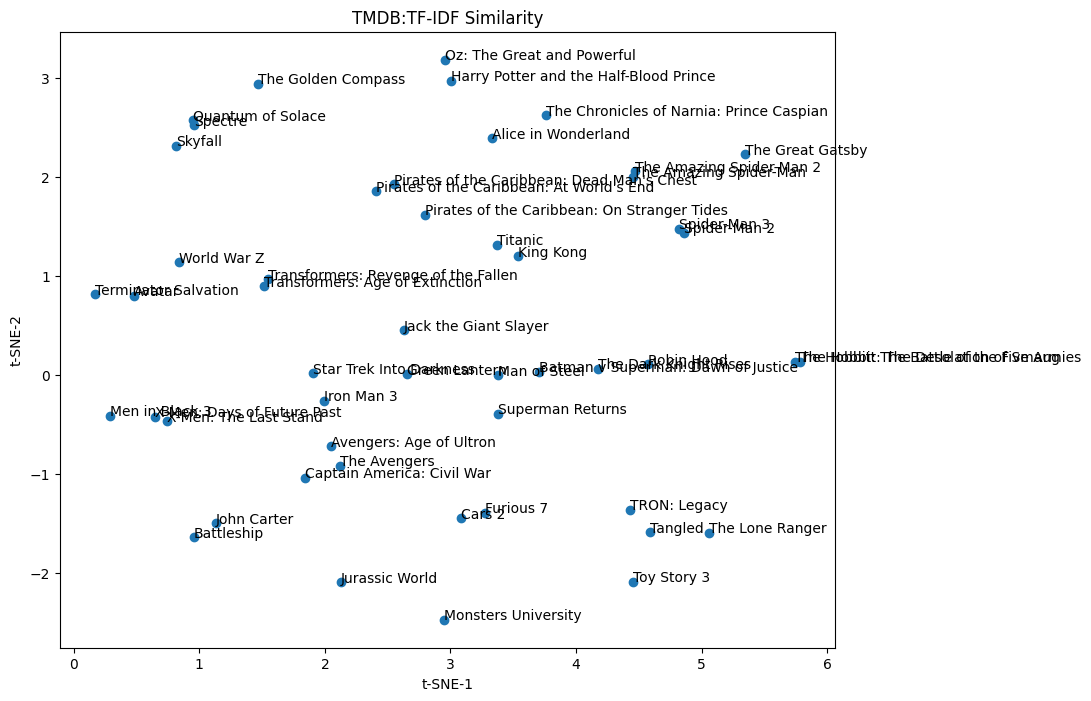

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

num_data = 50

# t-SNE를 사용하여 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(tfidf_matrix.toarray()[:num_data])

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='o')

for i, txt in enumerate(data['title'][:num_data]):
    plt.annotate(txt, (X_tsne[i, 0], X_tsne[i, 1]))

plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')
plt.title('TMDB:TF-IDF Similarity')
plt.show()